<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250319%5D%20Thesis%20Hybrid%20RF-LSTM%20with%20on%20WSN-DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training on WSN-DS dataset (5 Classes)**

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 587.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
#Imports various Python libraries necessary
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
#from keras.utils import np_utils
#from tensorflow.keras import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [ ]:
# Load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")

# Preprocessing: Handle missing values (if any)
dataset = dataset.dropna() # Remove missing values

In [ ]:
dataset

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Class
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,0
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,0
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,0
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,0
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,0
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,0
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,0
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,0


In [ ]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

print("Original Class Distribution:", np.bincount(y))

Original Class Distribution: [340066  14596  10049   6638   3312]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler here
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Verify the balanced dataset distribution
print("Balanced Class Distribution:", np.bincount(y))

Balanced Class Distribution: [340066 340066 340066 340066 340066]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Extract features from RF model
train_rf_features = rf_model.predict(X_train)
test_rf_features = rf_model.predict(X_test)

# Reshape RF features for LSTM input - Adding a new axis to create a 2D array before reshaping
train_rf_features = train_rf_features[:, np.newaxis]  # Reshape to (n_samples, 1)
test_rf_features = test_rf_features[:, np.newaxis]    # Reshape to (n_samples, 1)

# Reshape for LSTM input - Using the correct shape for 3D input
train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, train_rf_features.shape[1]))
test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, test_rf_features.shape[1]))

In [ ]:
# prompt: Display the value of an accuracy, precision, recall, F1-Score, AUC-ROC, and FPR of the RF model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')


# Calculate AUC-ROC
y_probs = rf_model.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_probs, multi_class='ovr')

# Calculate FPR - Modified to handle varying array lengths
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Assuming you have 5 classes
    fpr[i], tpr[i], _ = roc_curve(np_utils.to_categorical(y_test)[:, i], y_probs[:, i])
    roc_auc[i] = roc_auc_score(np_utils.to_categorical(y_test)[:, i], y_probs[:, i])

# Calculate mean FPR - Handling varying lengths
# Initialize an empty list to store FPR values
fpr_values = []
# Iterate through the FPR values for each class
for i in range(len(fpr)):
    # Extend the fpr_values list with the FPR values for the current class
    fpr_values.extend(fpr[i])

# Print the metrics
print(f"Accuracy: {accuracy:.14f}")
print(f"Precision: {precision:.14f}")
print(f"Recall: {recall:.14f}")
print(f"F1-Score: {f1:.14f}")
print(f"AUC-ROC: {auc_roc:.14f}")
print(f"Mean FPR: {np.mean(fpr_values):.14f}") # Calculate the mean of all FPR values

Accuracy: 0.99915604617927
Precision: 0.99915599075482
Recall: 0.99915604617927
F1-Score: 0.99915590031789
AUC-ROC: 0.99999055982655
Mean FPR: 0.01210246284422


In [ ]:
# Train LSTM model with RF features
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, train_rf_features.shape[2]), return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(16, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(5, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Convert y_train and y_test to one-hot encoded format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5)  # Assuming you have 4 classes
y_test = to_categorical(y_test, num_classes=5)
history = lstm_model.fit(train_rf_features, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate hybrid model on test set
test_lstm_features = lstm_model.predict(test_rf_features)
test_rf_lstm_predictions = np.argmax(test_lstm_features, axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
17004/17004 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - accuracy: 0.9595 - loss: 0.1347 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 2/100
17004/17004 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 0.9998 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 3/100
17004/17004 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9998 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 4/100
17004/17004 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.9998 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/100
17004/17004 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9998 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/100
17004/17004 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9998 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 7/100
17004/17004 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.9998 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/100
17004/17004 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - ac

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions)
recall = recall_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
precision = precision_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
f1score = f1_score(np.argmax(y_test, axis=1), test_rf_lstm_predictions, average='weighted')
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), test_rf_lstm_predictions)
classification_rep = classification_report(np.argmax(y_test, axis=1), test_rf_lstm_predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1score)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9991560461792711
Recall: 0.9991560461792711
Precision: 0.9991559907548165
F1-Score: 0.9991559003178917
Confusion Matrix:
 [[67864    50     1    40    58]
 [    1 67989    23     0     0]
 [    0    12 68001     0     0]
 [   99     1     1 67913     0]
 [    0     0     0     1 68012]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     68013
           1       1.00      1.00      1.00     68013
           2       1.00      1.00      1.00     68013
           3       1.00      1.00      1.00     68014
           4       1.00      1.00      1.00     68013

    accuracy                           1.00    340066
   macro avg       1.00      1.00      1.00    340066
weighted avg       1.00      1.00      1.00    340066



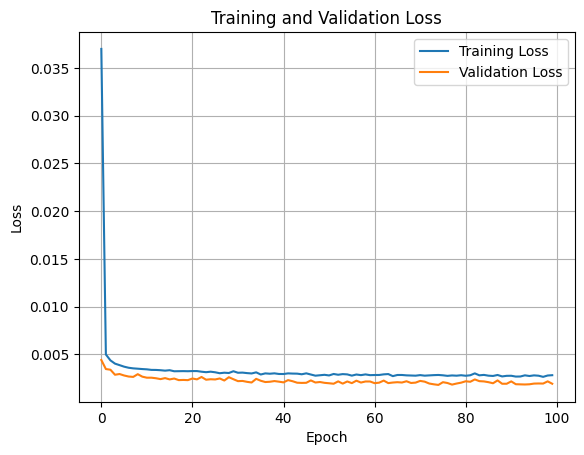

In [ ]:
# prompt: Plot training and validation loss with academic/mathmatically style

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()


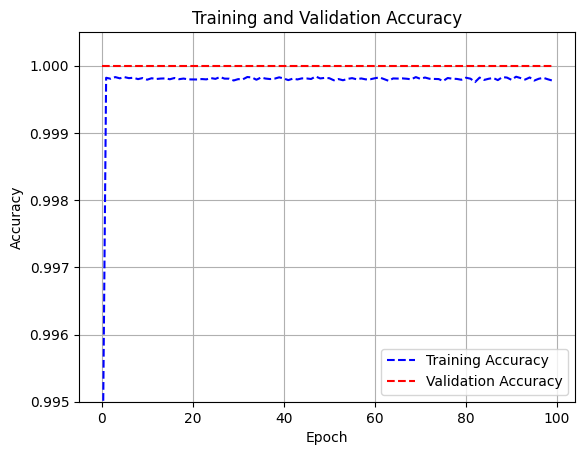

In [ ]:
# prompt: Plot training and validation accuracy with academic/mathmatically style with show y axis from 0.998 to 1

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.995, 1.0005)  # Set y-axis limits
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()


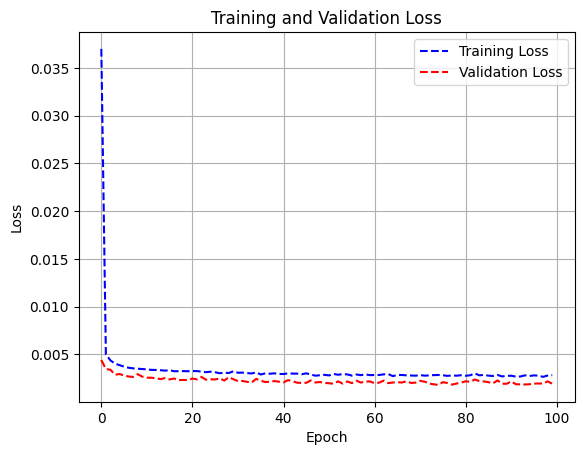

In [ ]:
# prompt: Plot training and validation loss with academic/mathmatically style with red and bule dot line

import matplotlib.pyplot as plt

# Plot training and validation loss with red and blue dotted lines
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


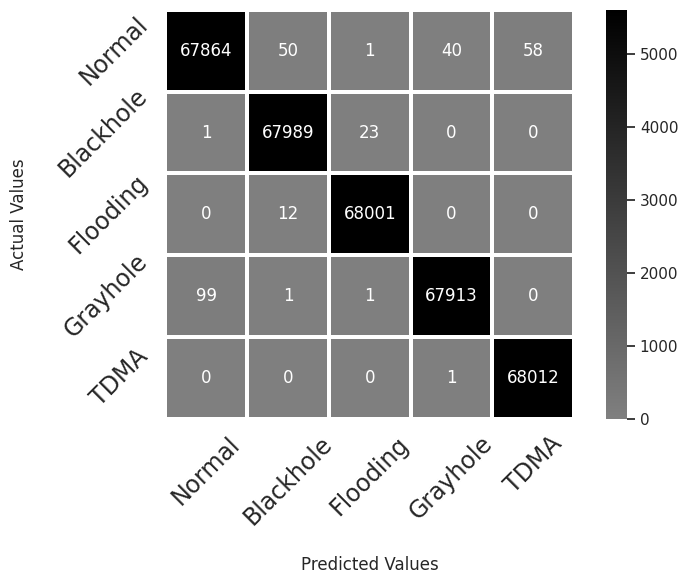

In [ ]:
# prompt: Display confusion matrix in heatmap with inclease text size and include space between each class label

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'confusion_mat' is your confusion matrix variable
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="gist_yarg",
                 vmin=0, vmax=5600, center=0, square=True, linewidths=1.5)
sns.set(font_scale=1) #Fixed indentation
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');
ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])

# Add space between x-axis labels
plt.xticks(fontsize=17, rotation=45) # Add this line to rotate the x-axis labels by 45 degrees
plt.yticks(fontsize=17, rotation=45) # Add this line to rotate the x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

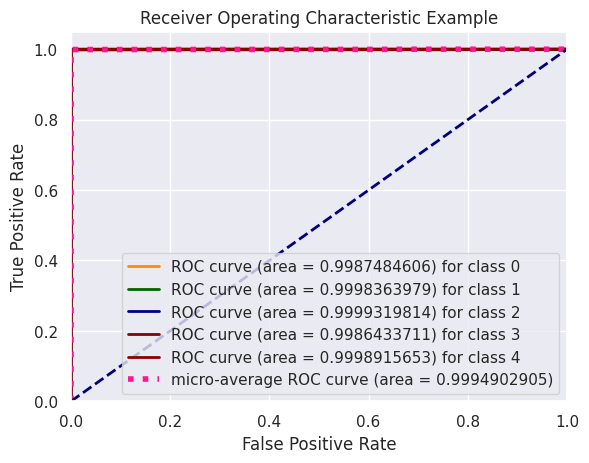

AUC Score for class 0: 0.9987484606051897
AUC Score for class 1: 0.9998363978823444
AUC Score for class 2: 0.9999319813581298
AUC Score for class 3: 0.9986433711110612
AUC Score for class 4: 0.9998915652735002
Micro-average AUC Score: 0.9994902905448152


In [ ]:
# prompt: Display AUC and ROC curves with also show micro avg.

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output - Include all classes present in y_test
# Assuming y_test has values from 0 to 4 (5 classes)
n_classes = 5  # Set the total number of classes to 5
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), test_lstm_features.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.10f) for class 0' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve (area = %0.10f) for class 1' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkblue',
         lw=lw, label='ROC curve (area = %0.10f) for class 2' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='darkred',
         lw=lw, label='ROC curve (area = %0.10f) for class 3' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='darkred',
         lw=lw, label='ROC curve (area = %0.10f) for class 4' % roc_auc[4])

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.10f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

# Print AUC scores for each class and the micro average
for i in range(n_classes):
    print(f"AUC Score for class {i}:", roc_auc[i])
print("Micro-average AUC Score:", roc_auc["micro"])

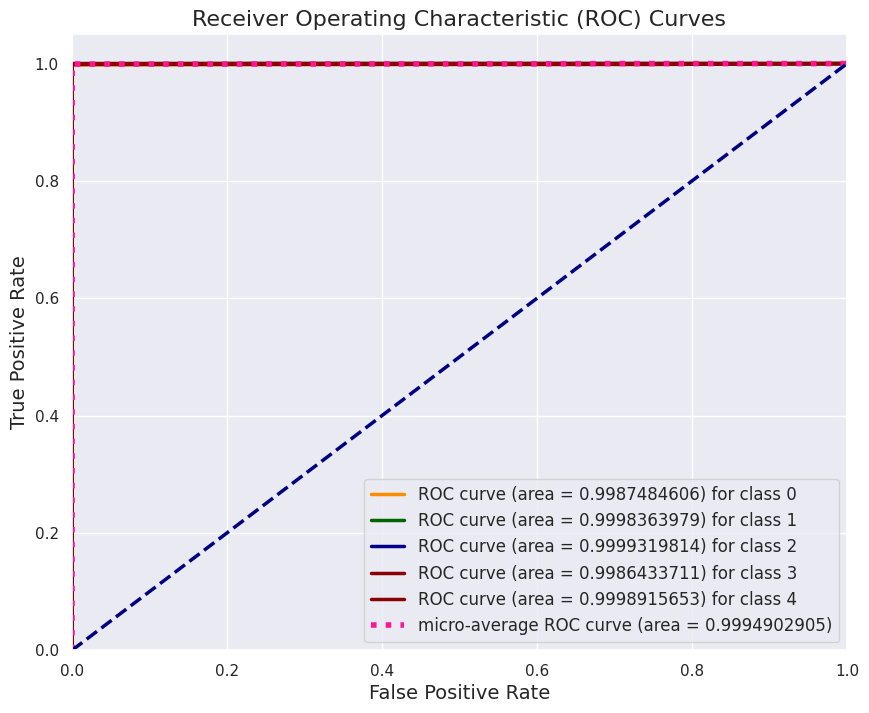

AUC Score for class 0: 0.9987484606051897
AUC Score for class 1: 0.9998363978823444
AUC Score for class 2: 0.9999319813581298
AUC Score for class 3: 0.9986433711110612
AUC Score for class 4: 0.9998915652735002
Micro-average AUC Score: 0.9994902905448152


In [ ]:
# prompt: Display AUC and ROC curves with also show micro avg. with a proper size to show in Thesis

from sklearn.preprocessing import label_binarize

# ... (Your existing code) ...

# Binarize the output - Include all classes present in y_test
# Assuming y_test has values from 0 to 4 (5 classes)
n_classes = 5  # Set the total number of classes to 5
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), test_lstm_features.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curves for the multiclass problem
plt.figure(figsize=(10, 8))  # Set figure size for better visualization
lw = 2.5
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.10f) for class 0' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkgreen',
         lw=lw, label='ROC curve (area = %0.10f) for class 1' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkblue',
         lw=lw, label='ROC curve (area = %0.10f) for class 2' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='darkred',
         lw=lw, label='ROC curve (area = %0.10f) for class 3' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='darkred',
         lw=lw, label='ROC curve (area = %0.10f) for class 4' % roc_auc[4])

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.10f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)  # Add grid lines for better readability
plt.show()

# Print AUC scores for each class and the micro average
for i in range(n_classes):
    print(f"AUC Score for class {i}:", roc_auc[i])
print("Micro-average AUC Score:", roc_auc["micro"])

In [ ]:
# prompt: Display detection rates in each class

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming 'confusion_mat' is your confusion matrix from the previous code
# and test_lstm_features and y_test are available

# ... (Your existing code)

# Binarize the output
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"Detection Rate for Class {i}: {roc_auc[i]}")

Detection Rate for Class 0: 0.9987484606051897
Detection Rate for Class 1: 0.9998363978823444
Detection Rate for Class 2: 0.9999319813581298
Detection Rate for Class 3: 0.9986433711110612
Detection Rate for Class 4: 0.9998915652735002


In [ ]:
# prompt: Display False Positive Rate (FPR) and True Positive Rate (TPR)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# ... (Your existing code) ...

# Binarize the output - Include all classes present in y_test
# Assuming y_test has values from 0 to 4 (5 classes)
n_classes = 5  # Set the total number of classes to 5
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print FPR and TPR for each class
for i in range(n_classes):
  print(f"Class {i}:")
  print(f"  FPR: {fpr[i]}")
  print(f"  TPR: {tpr[i]}")

Class 0:
  FPR: [0.00000000e+00 3.67575436e-04 3.71251190e-04 2.50326223e-01
 2.50329899e-01 4.99961405e-01 7.50004595e-01 1.00000000e+00]
  TPR: [0.         0.99780924 0.99780924 0.9985444  0.9985444  0.99913252
 0.99914722 1.        ]
Class 1:
  FPR: [0.00000000e+00 0.00000000e+00 2.31572524e-04 2.50193896e-01
 5.00009189e-01 5.00012865e-01 7.49791401e-01 1.00000000e+00]
  TPR: [0.00000000e+00 1.47030715e-05 9.99647126e-01 9.99985297e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
Class 2:
  FPR: [0.00000000e+00 9.18938589e-05 9.55696133e-05 2.50190220e-01
 2.50193896e-01 4.99972432e-01 7.49791401e-01 1.00000000e+00]
  TPR: [0.         0.99982356 0.99982356 1.         1.         1.
 1.         1.        ]
Class 3:
  FPR: [0.00000000e+00 0.00000000e+00 1.50706483e-04 2.50194816e-01
 2.50198491e-01 5.00334495e-01 7.50544014e-01 1.00000000e+00]
  TPR: [0.00000000e+00 1.47028553e-05 9.98515012e-01 9.98529714e-01
 9.98529714e-01 9.98544417e-01 9.98544417e-01 1.00000000e+

In [ ]:
# prompt: Display overall FPR and TPR of the model

# Calculate overall FPR and TPR (Micro-average)
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), test_lstm_features.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

print("Overall (Micro-average) FPR:", fpr_micro)
print("Overall (Micro-average) TPR:", tpr_micro)

Overall (Micro-average) FPR: [0.00000000e+00 0.00000000e+00 2.10988455e-04 2.11723607e-04
 5.02306905e-02 5.02314257e-02 1.00187170e-01 1.00187905e-01
 1.50142913e-01 2.00151588e-01 2.00152323e-01 2.50143355e-01
 3.00135856e-01 3.00136591e-01 3.50163645e-01 4.00126740e-01
 4.00127475e-01 4.50053813e-01 5.00095570e-01 5.00096305e-01
 5.50052049e-01 6.00060724e-01 6.49951774e-01 6.99950892e-01
 7.49914722e-01 7.49915458e-01 7.99943246e-01 1.00000000e+00]
Overall (Micro-average) TPR: [0.00000000e+00 5.88121129e-06 9.99156046e-01 9.99156046e-01
 9.99191333e-01 9.99191333e-01 9.99191333e-01 9.99191333e-01
 9.99194274e-01 9.99197215e-01 9.99197215e-01 9.99344245e-01
 9.99411879e-01 9.99411879e-01 9.99414819e-01 9.99417760e-01
 9.99417760e-01 9.99535384e-01 9.99535384e-01 9.99535384e-01
 9.99535384e-01 9.99538325e-01 9.99829445e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
